# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def rolling_a_dice(x):
    dice_options = [1,2,3,4,5,6]
    dice_results = random.choices(dice_options, k=x)
    return pd.DataFrame(dice_results, columns=['results'])

dice_df = rolling_a_dice(10)


#### 2.- Plot the results sorted by value.

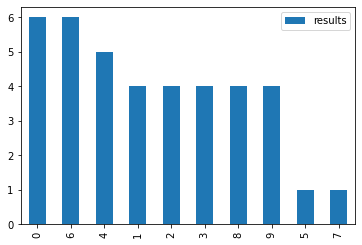

In [3]:
# your code here
dice_df.sort_values(by='results', ascending=False).plot.bar()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

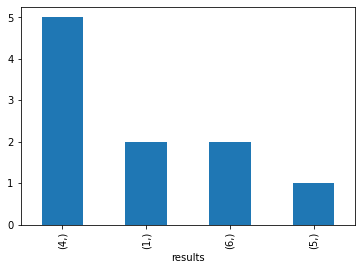

In [4]:
# your code here
frequency = dice_df.value_counts()
frequency.plot.bar()

In [5]:
"""
The first plot represents the value of the dice after each throw. That's why there are 10 bars in the first chart.
The second plot represents the frequency of each value within all the throws. 
That means, the number of columns with the same value of the first plot: 3 columns with value 3, 3 columns with value 4, etc

"""

"\nThe first plot represents the value of the dice after each throw. That's why there are 10 bars in the first chart.\nThe second plot represents the frequency of each value within all the throws. \nThat means, the number of columns with the same value of the first plot: 3 columns with value 3, 3 columns with value 4, etc\n\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def my_mean(x):
    suma = 0
    for i in x:
        suma += i
    media = suma/len(x)
    return media

my_mean(dice_df['results'])

3.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
dice_options = [1,2,3,4,5,6]
freq_dict = {}
freq_dict = freq_dict.fromkeys(dice_options)

for key, values in freq_dict.items():
    freq_dict[key] = 0


for i in dice_df['results']:
    if i in freq_dict.keys():
        freq_dict[i] += 1
        

In [8]:
#mean of all possible values of dice result:
my_mean(freq_dict.values())

1.6666666666666667

In [9]:
#mean of the values of dice result that has at least 1 appearance in the df (excluding 0)
values_without_zero = [i for i in freq_dict.values() if i!=0]
my_mean(values_without_zero)

2.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def my_median(x):
    x.sort()
    if len(x)%2 !=0:
        middle = int((len(x)/2) -0.5)
        median = x[middle]
        return median
    elif len(x)%2 == 0:
        middle1 = int(len(x)/2)
        middle2 = int(middle1 -1)
        median = (x[middle1] + x[middle2])/2
        return median

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [38]:
#your code here
def my_quartiles(x):
    if len(x)%2 != 0:
        x.sort()
        q2 = my_median(x)
        left_list = x[:x.index(q2)]
        q1 = my_median(left_list)
        right_list = x[x.index(q2)+1:]
        q3 = my_median(right_list)
        return f'q1 = {q1}, q2 = {q2}, q3 = {q3}'
    elif len(x)%2 ==0:
        x.sort()
        middle1 = int(len(x)/2)
        middle2 = int(middle1 -1)
        q2 = (x[middle1] + x[middle2])/2
        left_list = x[:middle2]
        q1 = my_median(left_list)
        right_list = x[middle1:]
        q3 = my_median(right_list)
        return f'q1 = {q1}, q2 = {q2}, q3 = {q3}'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

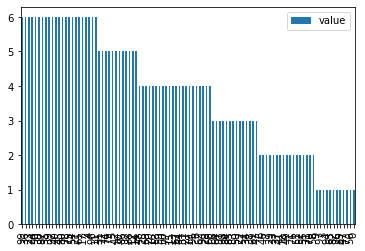

In [12]:
# your code here
dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_hundred = dice_hundred.sort_values(by='value', ascending=False)
dice_hundred[['value']].plot.bar()


In [13]:
"""
The probability of obtaining each value in a roll is quite simital for all value. 
This can be seen in the number of columns for each value

"""

'\nThe probability of obtaining each value in a roll is quite simital for all value. \nThis can be seen in the number of columns for each value\n\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:
# your code here
my_mean(dice_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [15]:
# your code here
frequency_dice = dice_hundred['value'].value_counts()
frequency_dice

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

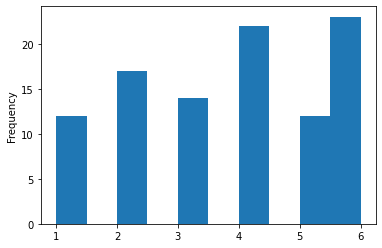

In [16]:
# your code here:
dice_hundred['value'].plot.hist()

In [17]:
"""
It makes sense to have the mean showed above and the distribution of the histogram. 
If we draw the mean as a vertical line, it makes sense that the mean is slighly to the right of the number 3
because there are more records with value > 3 than with value < 3

"""

'\nIt makes sense to have the mean showed above and the distribution of the histogram. \nIf we draw the mean as a vertical line, it makes sense that the mean is slighly to the right of the number 3\nbecause there are more records with value > 3 than with value < 3\n\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

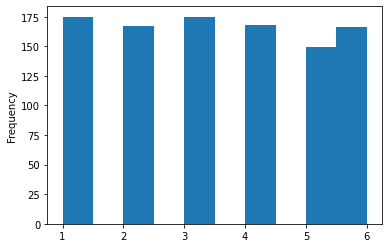

In [19]:
# your code here
dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
dice_thousand['value'].plot.hist()

In [ ]:
"""
The plot has changed because the greater the sample size, the more balanced the distribution

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

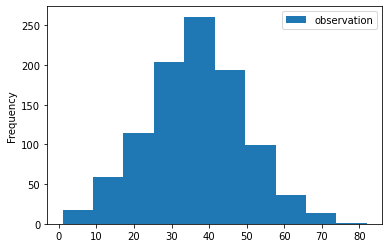

In [22]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population.plot.hist()

'''
The mean will be near 35 and the standard deviation will be 10 o 15 aprox.
'''

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [26]:
# your code here
mean_ages = np.mean(ages_population['observation'])
std_ages = np.std(ages_population['observation'])
print(f'mean: {mean_ages}, std: {std_ages}')

mean: 36.56, std: 12.81008977329979


In [ ]:
"""
Yes, I estimated 35 as mean and 10 to 15 as std

"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [28]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2.value_counts()

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64

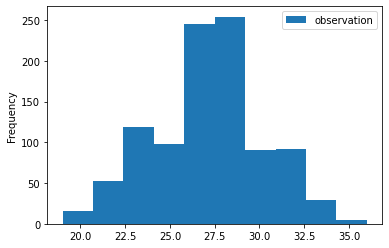

In [29]:
ages2.plot.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes, the shape of the histogram is different, with a peak of frequency near the 27.5
Also, the age values are different (the range is only for younger people, from 20 to 35 yo)

"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [30]:
# your code here
ages2_mean = np.mean(ages2['observation'])
ages2_std = np.std(ages2['observation'])
print(f'mean: {ages2_mean}, std: {ages2_std}')

mean: 27.155, std: 2.9683286543103704


In [ ]:
"""
This values are totally alligned with the peak i said before. 
The peak represents a concentration of values near the 27.5 so it makes sense to obtain the mean near that value
and also a low std (lower dispersion of data in this plot than in the previous one)
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [31]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.value_counts()

observation
32.0           37
37.0           31
35.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64

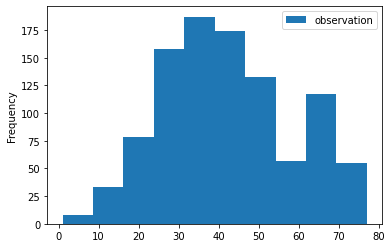

In [32]:
ages3.plot.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [34]:
# your code here
ages3_mean = np.mean(ages3['observation'])
ages3_std = np.std(ages3['observation'])
print(f'mean: {ages3_mean}, std: {ages3_std}')

mean: 41.989, std: 16.136631587788084


In [ ]:
"""
This histogram represents a distribution with skewness to the right 
This means that there are more values to the right of the mean than to the left (in this case, older people)
this is why the mean and the std increase
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [39]:
# your code here

my_quartiles(list(ages3['observation']))

'q1 = 30.0, q2 = 40.0, q3 = 53.0'

In [43]:
#this is just to check if my function works fine: 
q1 = np.quantile(ages3['observation'], 0.25)
q2 = np.quantile(ages3['observation'], 0.5)
q3 = np.quantile(ages3['observation'], 0.75)
print(f'q1= {q1}, q2= {q2}, q3= {q3}')

q1= 30.0, q2= 40.0, q3= 53.0


In [ ]:
"""
The mean is higher than the median because of the higher concentration of values on the right of the histogram
This increases the mean value but does not affect necessarily to the median
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [54]:
# your code here
np.quantile(ages3['observation'], 0.55)


42.0

In [ ]:
"""
The 55 percentile is more similar to the mean. 
In a normal distribution, the mean and the median (50 percentile) should be the same. 
This shows the influence of the values that are placed on the right of the histogram 
(higher values that increase the mean)
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [65]:
# your code here
comparison = {}
comparison['df1 n'] = len(ages_population)
comparison['df1 mean'] = np.mean(ages_population['observation'])
comparison['df1 std'] = np.std(ages_population['observation'])
comparison['df1 median'] = np.median(ages_population['observation'])
comparison['df1 q1'] = np.quantile(ages_population['observation'], 0.25)
comparison['df1 q3'] = np.quantile(ages_population['observation'], 0.75)
comparison['df2 n'] = len(ages2)
comparison['df2 mean'] = np.mean(ages2['observation'])
comparison['df2 std'] = np.std(ages2['observation'])
comparison['df2 median'] = np.median(ages2['observation'])
comparison['df2 q1'] = np.quantile(ages2['observation'], 0.25)
comparison['df2 q3'] = np.quantile(ages2['observation'], 0.75)
comparison['df13 n'] = len(ages3)
comparison['df3 mean'] = np.mean(ages3['observation'])
comparison['df3 std'] = np.std(ages3['observation'])
comparison['df3 median'] = np.median(ages3['observation'])
comparison['df3 q1'] = np.quantile(ages3['observation'], 0.25)
comparison['df3 q3'] = np.quantile(ages3['observation'], 0.75)
comparison

{'df1 n': 1000,
 'df1 mean': 36.56,
 'df1 std': 12.81008977329979,
 'df1 median': 37.0,
 'df1 q1': 28.0,
 'df1 q3': 45.0,
 'df2 n': 1000,
 'df2 mean': 27.155,
 'df2 std': 2.9683286543103704,
 'df2 median': 27.0,
 'df2 q1': 25.0,
 'df2 q3': 29.0,
 'df13 n': 1000,
 'df3 mean': 41.989,
 'df3 std': 16.136631587788084,
 'df3 median': 40.0,
 'df3 q1': 30.0,
 'df3 q3': 53.0}

In [67]:
comparison_df = pd.DataFrame(comparison, index=[0])
comparison_df = comparison_df.T
comparison_df

,0
df1 n,1000.000000
df1 mean,36.560000
df1 std,12.810090
df1 median,37.000000
df1 q1,28.000000
df1 q3,45.000000
df2 n,1000.000000
df2 mean,27.155000
df2 std,2.968329
df2 median,27.000000


In [ ]:
"""
All the df have the same sample size (n=1000)
The first one and the second one have close values between the mean and the median, 
but only the first one seems to have normal distribution regarding the plot. 
The second one represents data only from young people (because of the values of the quartiles)
And the third one has more values in the percentil from 50 to 100, increasen the mean value. 
"""